# 🚗 Used Cars in Germany Analysis

---

## 🎯 Objective
Analyze the dataset to uncover **trends, patterns, and insights** about used car pricing and popularity.

---

## ❓ Business Questions

1. **💰 Resale Value:**  
   Which car brands and models retain the most value over time?

2. **📊 Price Factors:**  
   How do mileage, age, fuel type, and region affect car prices?

3. **🔥 Popularity:**  
   What are the most popular cars by region and price range?

# ---------------- German Version -----------------

# 🚗 Analyse von Gebrauchtwagen in Deutschland

---

## 🎯 Zielsetzung
Analyse des Datensatzes, um **Trends, Muster und Erkenntnisse** über Preise und Beliebtheit von Gebrauchtwagen zu gewinnen.

---

## ❓ Geschäftsfragen

1. **💰 Wiederverkaufswert:**  
   Welche Automarken und -modelle behalten im Laufe der Zeit den höchsten Wert?

2. **📊 Preisfaktoren:**  
   Wie wirken sich Kilometerstand, Alter, Kraftstoffart und Region auf die Preise aus?

3. **🔥 Beliebtheit:**  
   Welche Autos sind nach Region und Preiskategorie am beliebtesten?



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars = pd.read_csv(r'C:\Users\lenovo\Desktop\Used_Cars_Analysis\data\raw\autoscout24-germany-dataset.csv')


In [3]:
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
cars = cars.rename(columns = {'make':'brand', 'gear':'transmission'})
cars.head()

,mileage,brand,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       46405 non-null  int64  
 1   brand         46405 non-null  object 
 2   model         46262 non-null  object 
 3   fuel          46405 non-null  object 
 4   transmission  46223 non-null  object 
 5   offerType     46405 non-null  object 
 6   price         46405 non-null  int64  
 7   hp            46376 non-null  float64
 8   year          46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [6]:
cars.isnull().sum()

mileage           0
brand             0
model           143
fuel              0
transmission    182
offerType         0
price             0
hp               29
year              0
dtype: int64

# 🧹 Step 3: Data Cleaning

Before starting the analysis, we need to **clean the dataset** to ensure it is accurate, consistent, and ready for exploration.  

Here’s the plan for cleaning the data:

1. **Handle missing values:**  
   - Fill missing `model` entries with `"Unknown"`  
   - Fill missing `transmission` entries with the most common value (mode)  
   - Fill missing `hp` (horsepower) with the median for the same brand

2. **Check for duplicates:**  
   - Remove any repeated listings

3. **Correct data types:**  
   - Ensure numeric columns (`price`, `mileage`, `hp`, `year`) are numeric  
   - Ensure categorical columns (`brand`, `model`, `fuel`, `transmission`) are strings or categorical


In [7]:
# Filling missing 'model' with 'unknown'
cars['model'] = cars['model'].fillna('Unknown')

# Filling missing 'transmission' with the most common value (mode)
cars['transmission'] = cars['transmission'].fillna(cars['transmission'].mode()[0])

# Fill missing 'hp' with median horsepower of the same brand
cars['hp']= cars.groupby('brand')['hp'].transform(lambda x: x.fillna(x.median()))

# Checking again for missing values
cars.isnull().sum()

mileage         0
brand           0
model           0
fuel            0
transmission    0
offerType       0
price           0
hp              0
year            0
dtype: int64

In [8]:
#Remove any repeated listings
cars = cars.drop_duplicates()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44265 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       44265 non-null  int64  
 1   brand         44265 non-null  object 
 2   model         44265 non-null  object 
 3   fuel          44265 non-null  object 
 4   transmission  44265 non-null  object 
 5   offerType     44265 non-null  object 
 6   price         44265 non-null  int64  
 7   hp            44265 non-null  float64
 8   year          44265 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


# ⚠ Step 4: Outlier Detection and Handling

Even though our dataset is now complete with no missing values, it may still contain **extreme or unrealistic values** that could distort our analysis.  

In this step, we will:

1. **Identify outliers** in key numeric columns:  
   - `price` – e.g., €0 or extremely high listings  
   - `mileage` – e.g., 0 km or unusually high values (>1,000,000 km)  
   - `hp` – unusually low or high horsepower  
   - `year` – cars with impossible manufacture years (e.g., in the future)  

2. **Handle outliers** by:  
   - Removing clearly impossible values  
   - Optionally capping extreme values to a reasonable range  

3. **Verify the dataset** after cleaning to ensure numeric columns are within realistic ranges.

After this step, our dataset will be **fully clean, consistent, and ready for Exploratory Data Analysis (EDA)**.


In [9]:
cars[['price','mileage','hp','year']].describe()

,price,mileage,hp,year
count,4.426500e+04,4.426500e+04,44265.000000,44265.000000
mean,1.655363e+04,7.225733e+04,133.585960,2015.932769
std,1.945799e+04,6.236057e+04,75.371497,3.120088
min,1.100000e+03,0.000000e+00,1.000000,2011.000000
25%,7.490000e+03,2.142900e+04,86.000000,2013.000000
50%,1.099000e+04,6.111100e+04,116.000000,2016.000000
75%,1.949000e+04,1.060000e+05,150.000000,2019.000000
max,1.199900e+06,1.111111e+06,850.000000,2021.000000


In [10]:
# Replace hp < 50 with median hp of that brand
cars.loc[cars['hp'] < 30, 'hp'] = cars.groupby('brand')['hp'].transform(lambda x: x.median())

In [11]:
# checking 0 mileage cars if they are outliers or not 
zero_mileage_cars = cars[cars['mileage']==0]
zero_mileage_cars

,mileage,brand,model,fuel,transmission,offerType,price,hp,year
2276,0,Hyundai,Kona,Electric,Manual,Used,44750,204.0,2021
2909,0,Land,Rover Discovery,Diesel,Automatic,Demonstration,79999,300.0,2021
5054,0,Hyundai,i10,Gasoline,Manual,New,12579,67.0,2021
5673,0,Hyundai,i30,Gasoline,Automatic,Demonstration,23450,140.0,2020
6110,0,Renault,Clio,Gasoline,Manual,Pre-registered,17250,91.0,2021
...,...,...,...,...,...,...,...,...,...
45900,0,Fiat,500,Gasoline,Manual,Pre-registered,13990,71.0,2021
45914,0,Abarth,595C,Gasoline,Manual,Demonstration,27290,179.0,2021
45979,0,Skoda,Kamiq,Gasoline,Manual,Pre-registered,18490,95.0,2021
45996,0,Dacia,Duster,Gasoline,Manual,Pre-registered,18080,131.0,2021


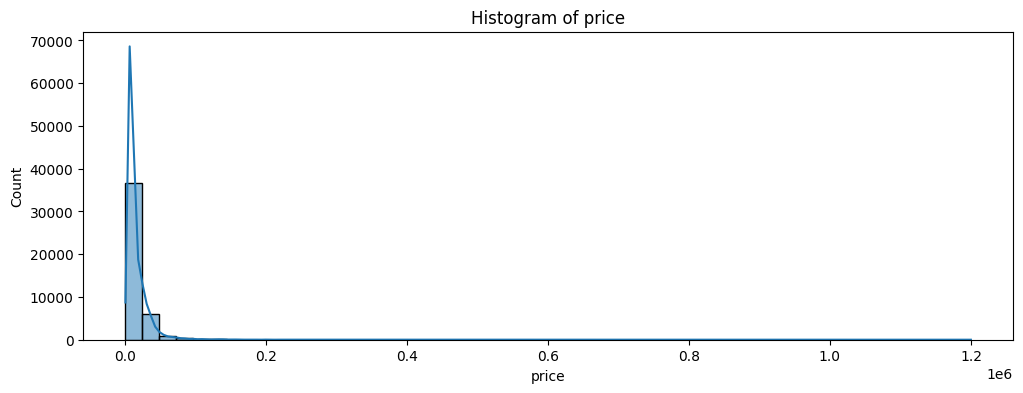

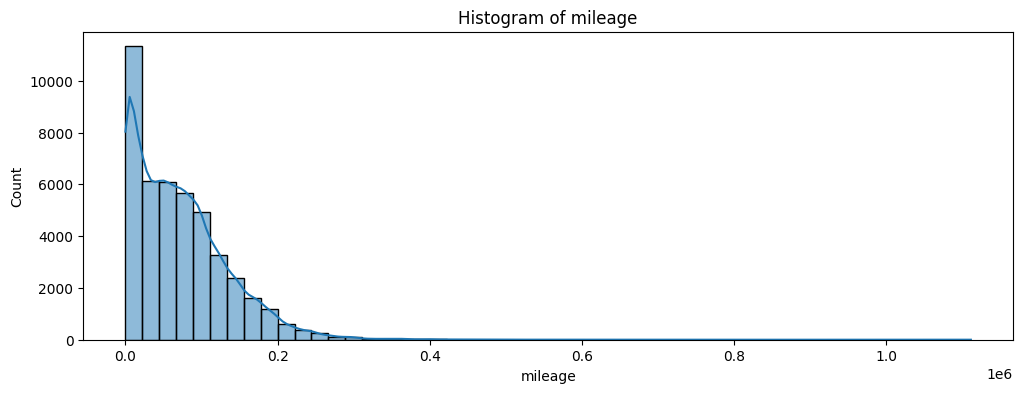

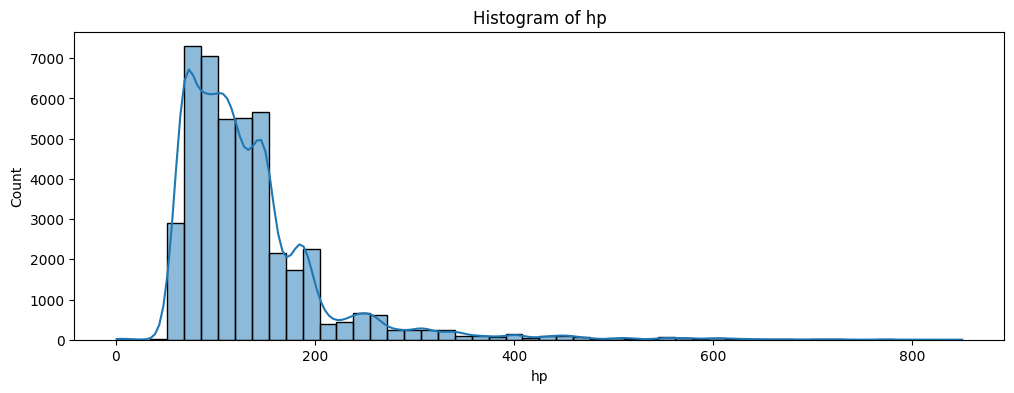

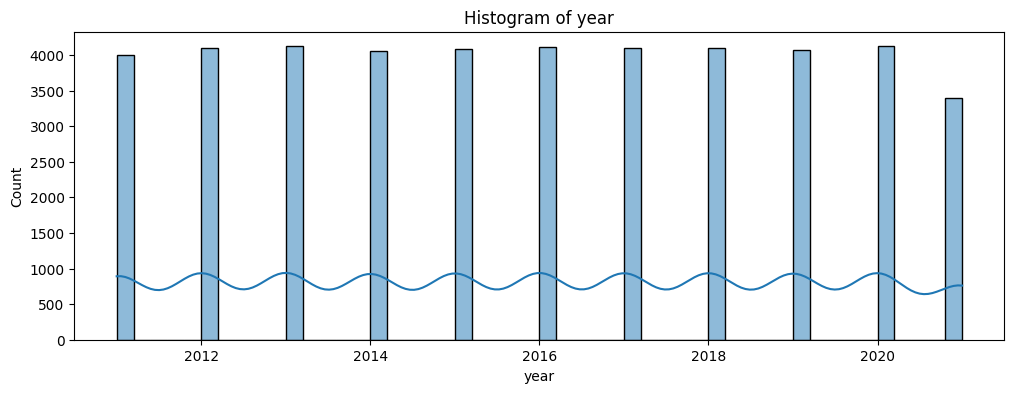

In [12]:
numeric_col = cars[['price','mileage','hp','year']]
for col in numeric_col:
    plt.figure(figsize=(12,4))
    sns.histplot(cars[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [13]:
# calculating the age of a car 
cars['car_age'] = 2025 - cars['year']

# calculating price per Horsepower
cars['price_per_hp'] = cars['price'] / cars['hp']

# price per mileage 
cars['price_per_km'] = cars['price'] / cars['mileage'].replace(0,1)

In [14]:
bins = [0, 10000, 20000, 40000, 1000000]
labels= ['low','Medium', 'High','Luxury']
cars['price_category'] = pd.cut(cars['price'], bins = bins, labels = labels)

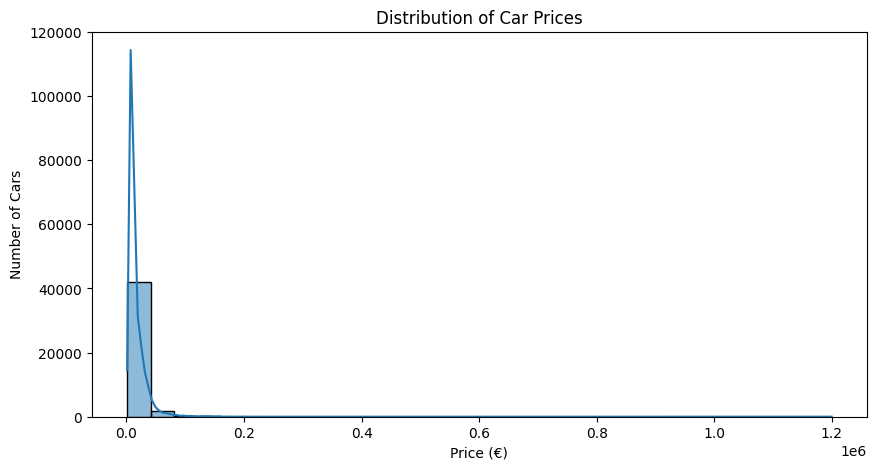

In [15]:
# Histogram for car prices
plt.figure(figsize=(10,5))
sns.histplot(cars['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (€)")
plt.ylabel("Number of Cars")
plt.show()

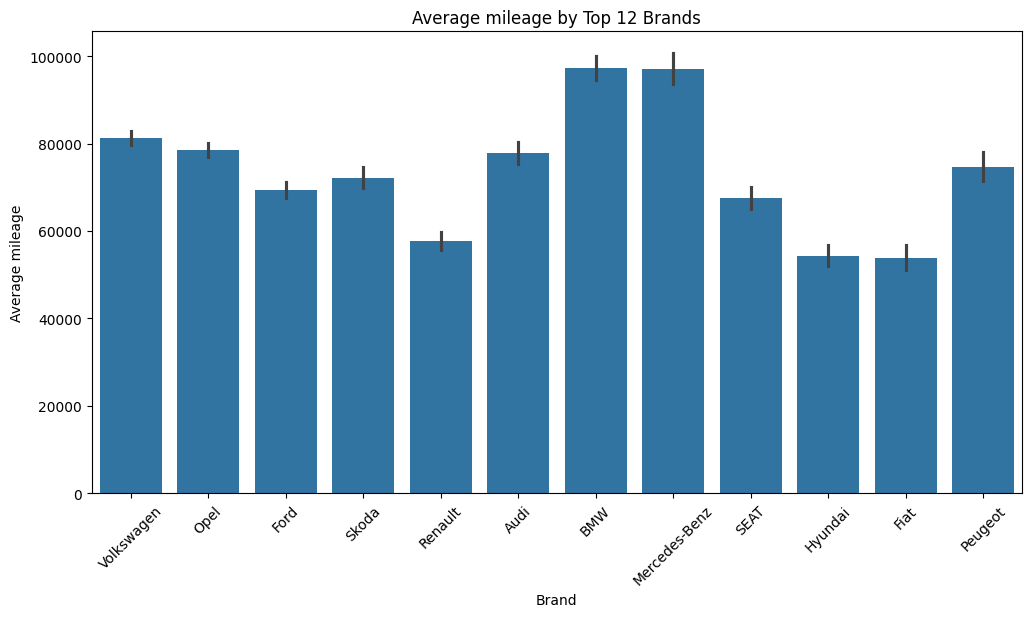

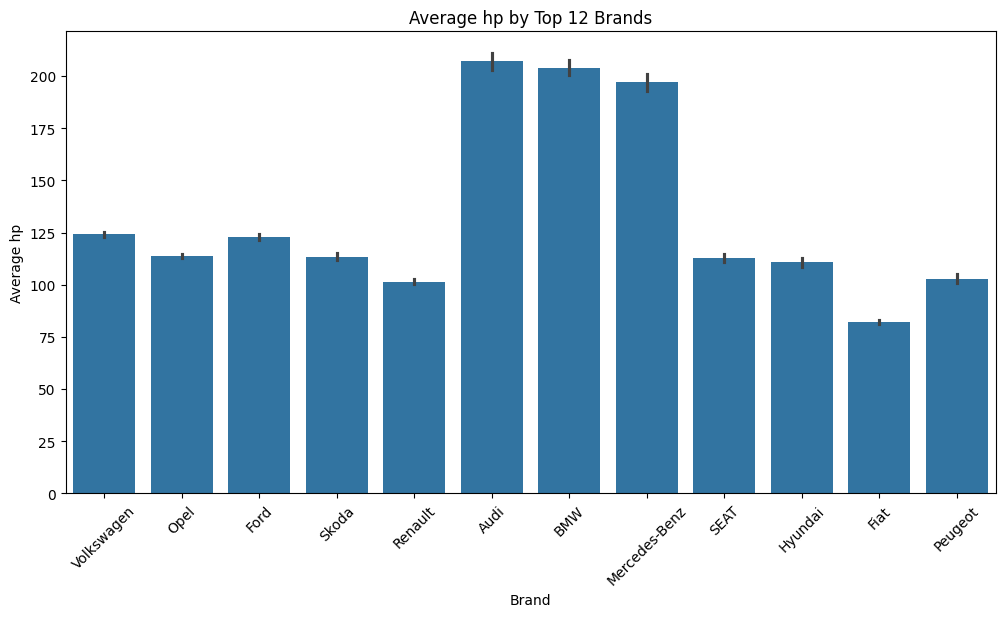

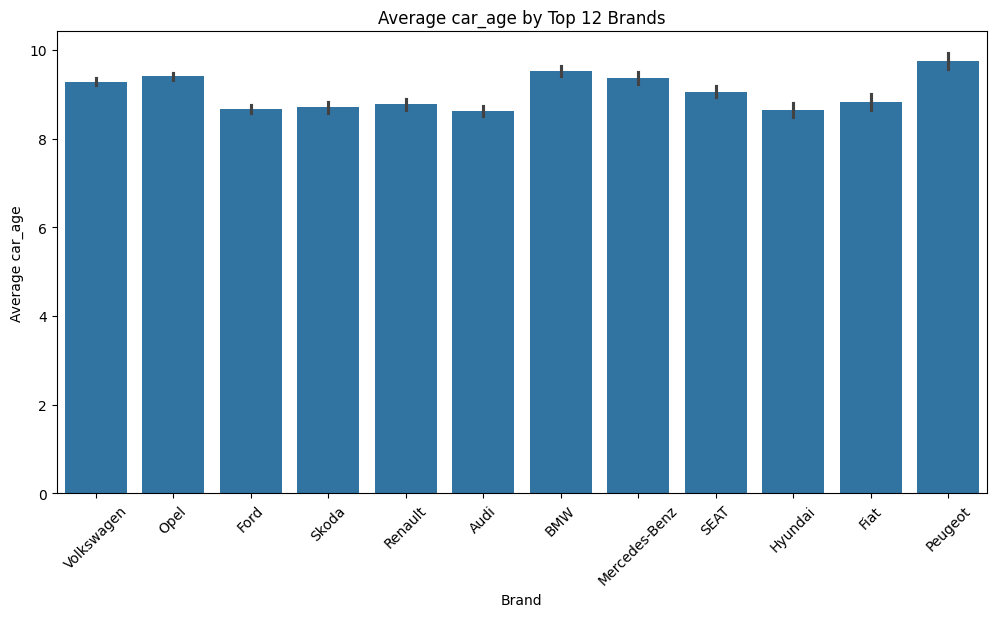

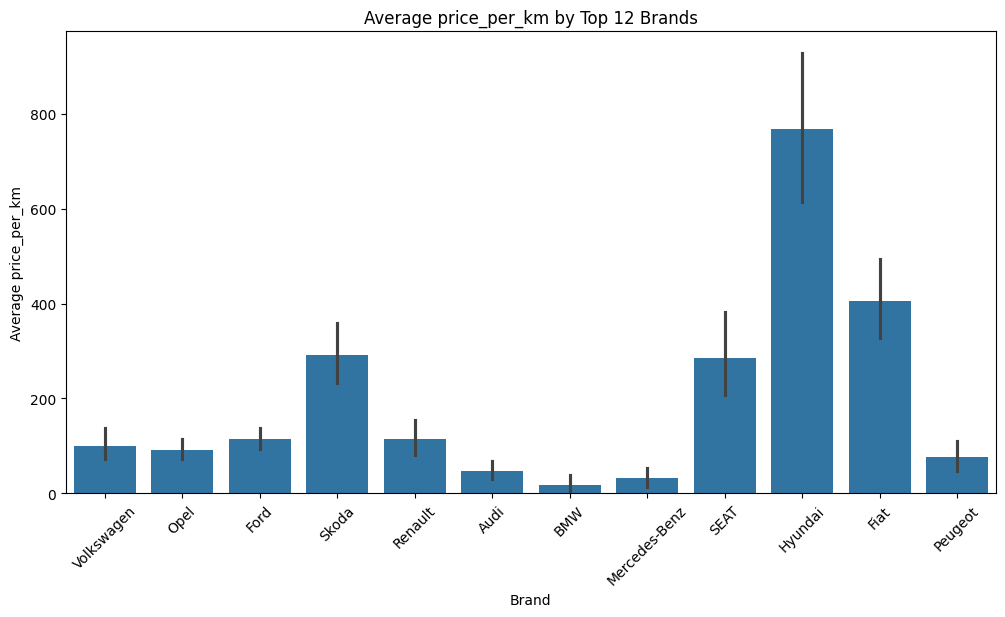

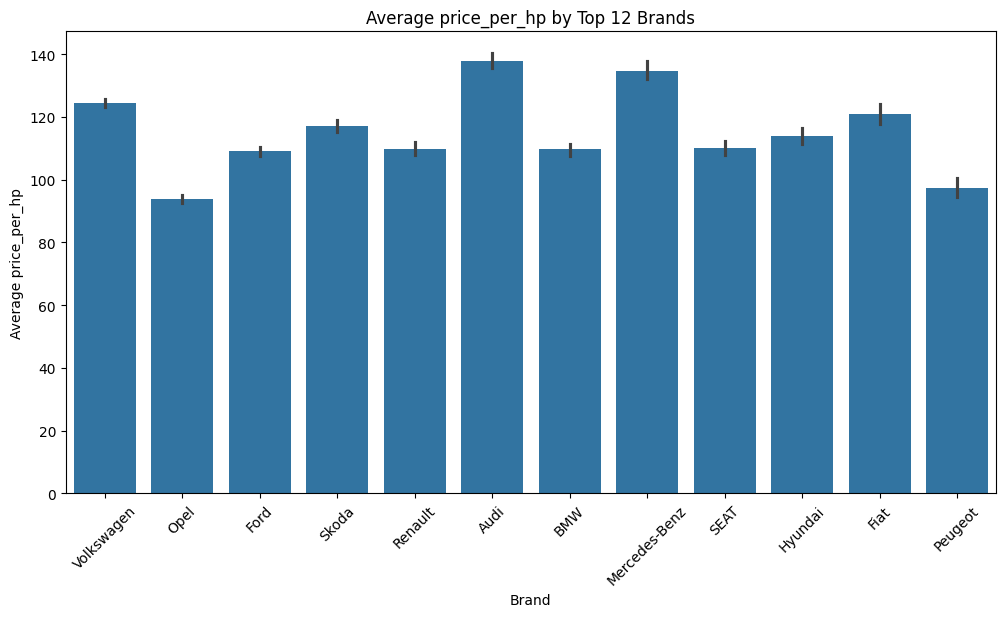

In [16]:
# Top 12 brands by number of cars
top_brands = cars['brand'].value_counts().nlargest(12).index
cars_top = cars[cars['brand'].isin(top_brands)]

numeric_cols = ['mileage','hp','car_age','price_per_km','price_per_hp']

for col in numeric_cols:
    plt.figure(figsize=(12,6))
    sns.barplot(data=cars_top, x='brand', y=col, order=top_brands, estimator=np.mean)
    plt.title(f"Average {col} by Top 12 Brands")
    plt.xlabel("Brand")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.show()

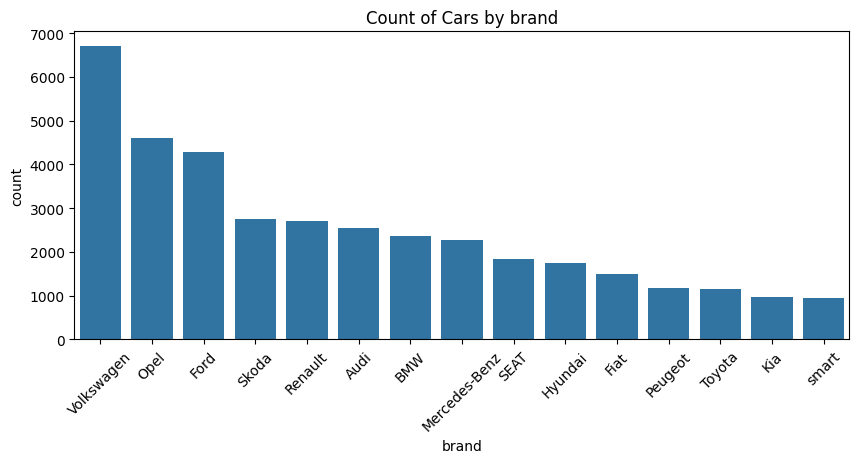

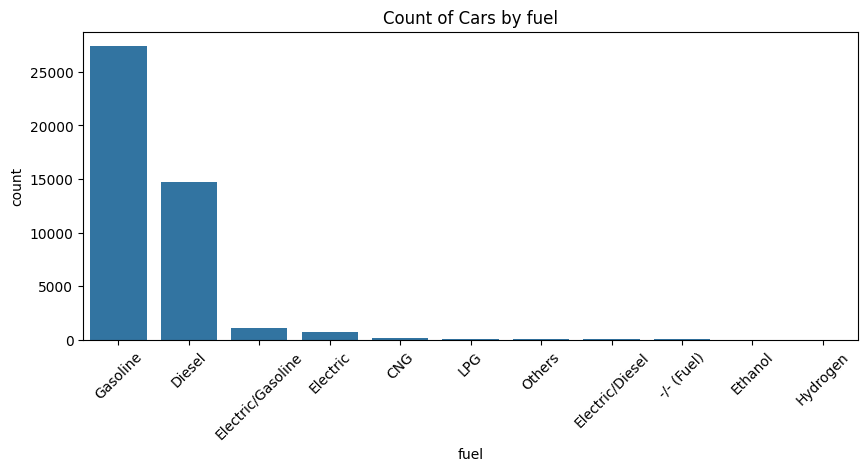

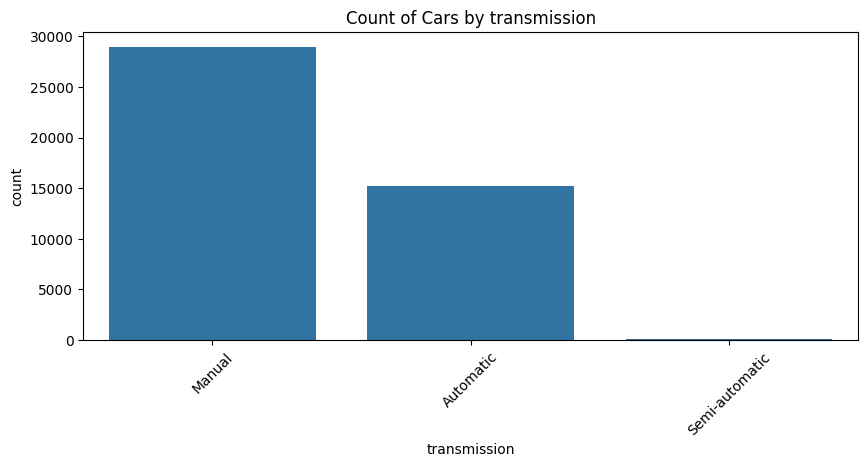

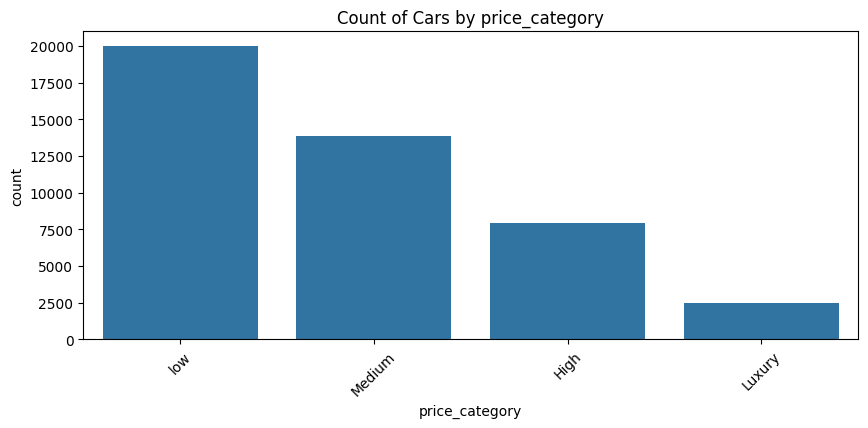

In [17]:
top_brands = cars['brand'].value_counts().nlargest(15).index

categorical_cols = ['brand', 'fuel', 'transmission', 'price_category']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    
    if col == 'brand':
        # Only plot top 12 brands
        sns.countplot(data=cars[cars['brand'].isin(top_brands)], x=col, order=top_brands)
    else:
        sns.countplot(data=cars, x=col, order=cars[col].value_counts().index)
        
    plt.title(f"Count of Cars by {col}")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
# Filtering the top brands
cars_top = cars[cars['brand'].isin(top_brands)]


summary_top_brands = cars_top.groupby('brand').agg(
    num_listings        = ('price', 'count'),      # number of cars listed per brand
    median_price        = ('price', 'median'),     # typical price per brand
    average_price       = ('price', 'mean'),       # mean price per brand
    price_std_dev       = ('price', 'std'),        # variation in price
    median_hp           = ('hp', 'median'),        # median horsepower per brand
    median_mileage      = ('mileage', 'median')    # typical mileage per brand
)
summary_top_brands.head()


,num_listings,median_price,average_price,price_std_dev,median_hp,median_mileage
brand,,,,,,
Audi,2549,23990.0,29786.266379,23675.423994,184.0,63000.0
BMW,2370,17900.0,23354.920253,17054.080911,184.0,89000.0
Fiat,1494,8700.0,9634.322624,4698.769313,69.0,41263.5
Ford,4276,10745.0,13746.194808,9047.266369,120.0,56418.0
Hyundai,1745,9980.0,12956.136390,8867.842951,101.0,48950.0


In [19]:
summary_top_brands.columns


Index(['num_listings', 'median_price', 'average_price', 'price_std_dev',
       'median_hp', 'median_mileage'],
      dtype='object')

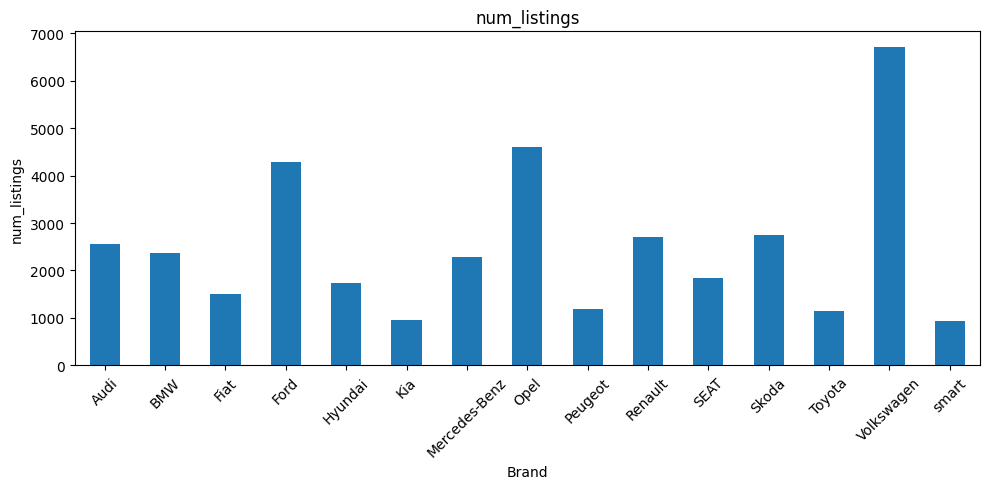

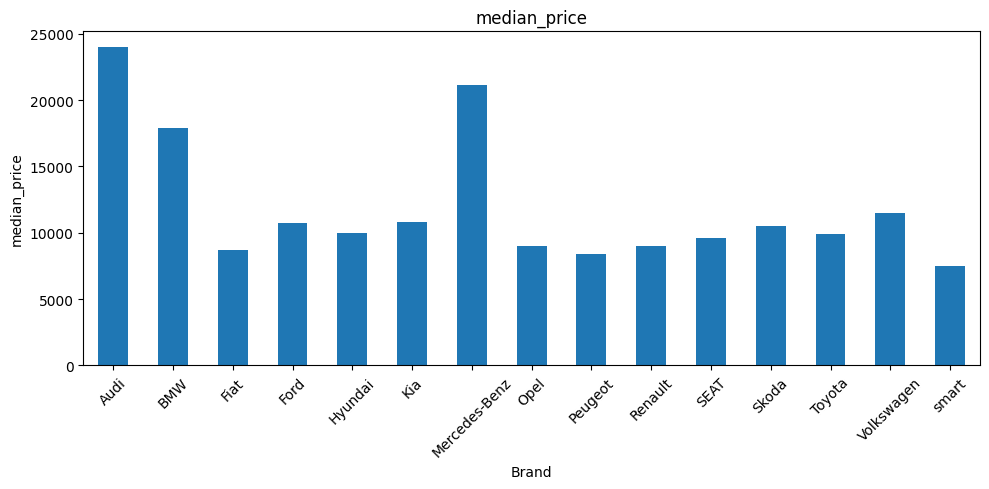

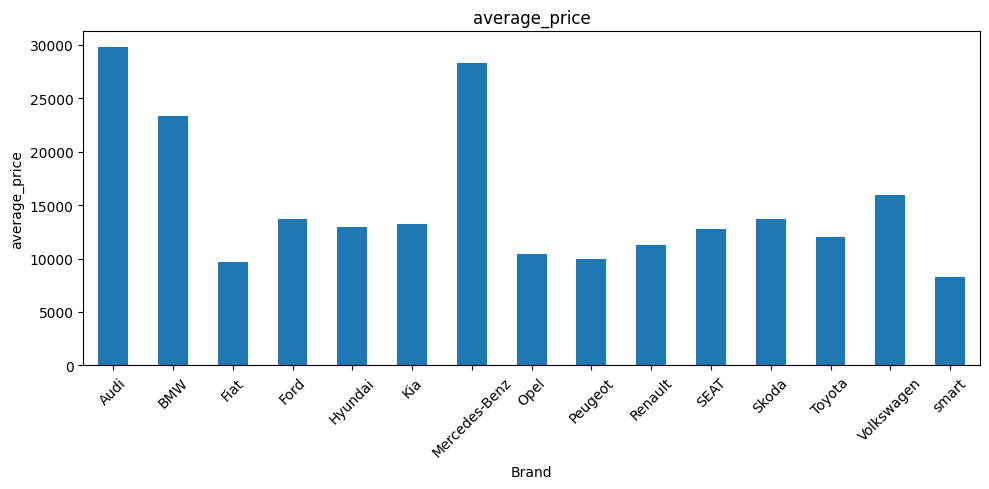

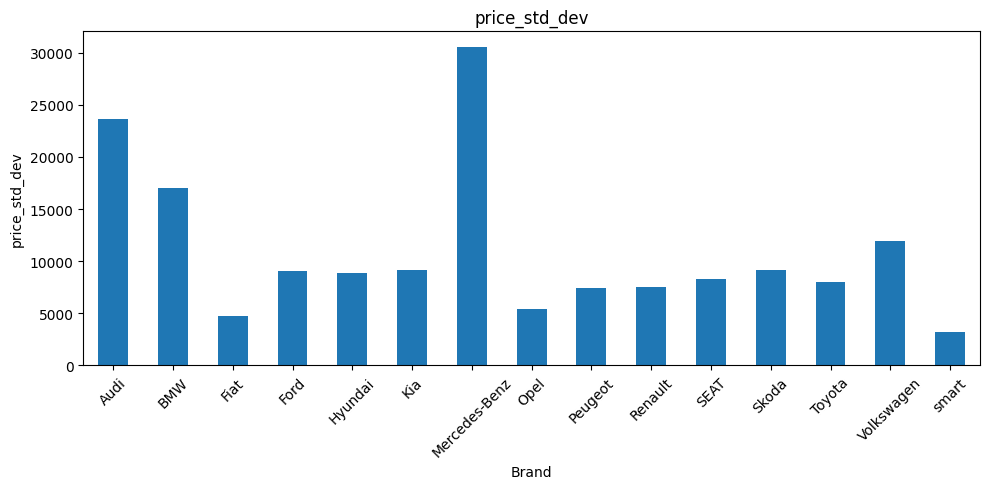

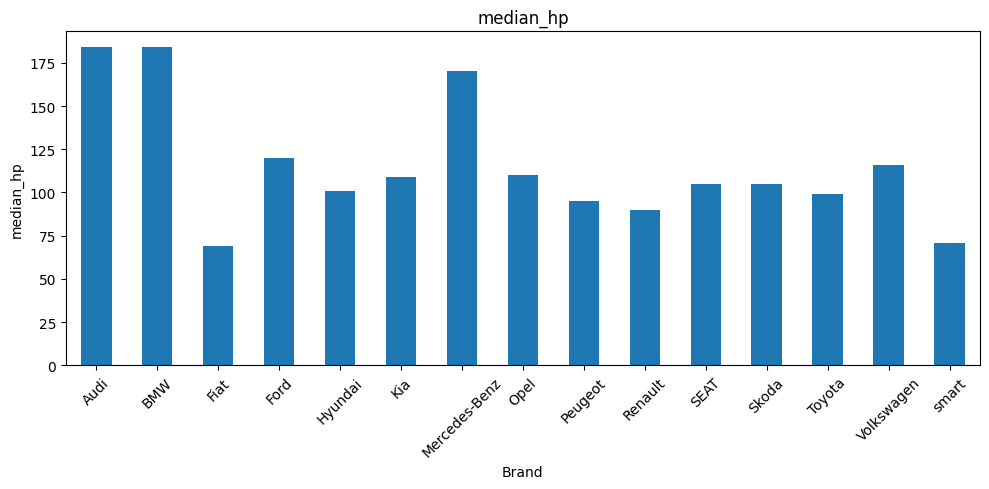

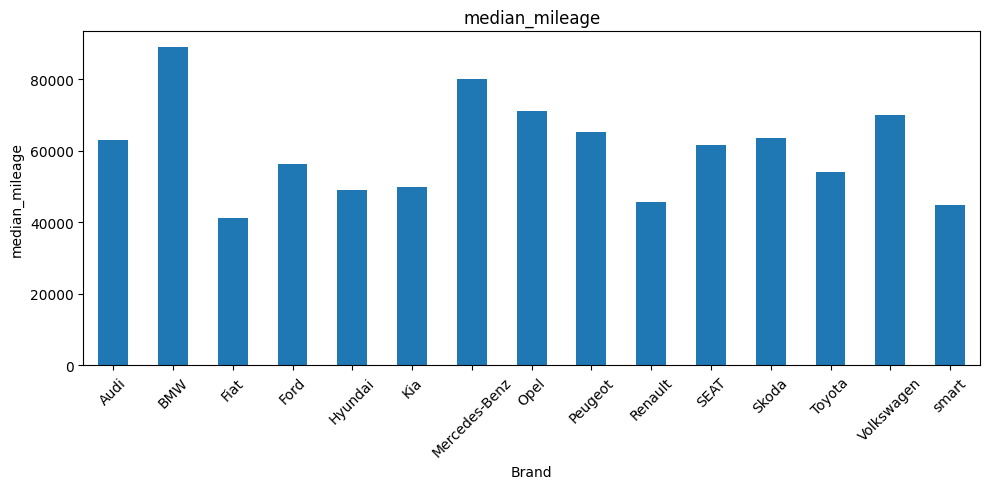

In [20]:
for col in summary_top_brands.columns:
    summary_top_brands[col].plot(kind='bar', figsize=(10,5), title=col)
    plt.xlabel('Brand')          
    plt.ylabel(col)              
    plt.xticks(rotation=45)      
    plt.tight_layout()           
    plt.show()
